# Library

In [7]:
import tensorflow as tf
import keras
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import numpy as np
from time import time
from tensorflow.keras.callbacks import TensorBoard
import random

# Data

In [8]:
from keras.datasets import fashion_mnist

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape) # Scale each image in dataset
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)  

In [11]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [12]:
X_train.shape,  y_train.shape, X_val.shape, y_val.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

[]

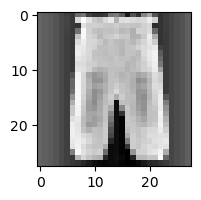

In [13]:
from numpy.random import randint

ix = randint(0, 47999,1)

plt.figure(figsize=(2,2))
plt.imshow(X_train[int(ix)], cmap='gray')
plt.plot()

In [14]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Model

In [15]:
def create_model():
    return tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10)])

# Training

In [16]:
#Test 1 without validation
model_test1 = create_model()

model_test1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tensorboard_1 = TensorBoard(log_dir = "./Question1/logs/Model_test_1/".format(time()))

model_test1.fit(X_train, y_train, epochs=10, verbose = 2, callbacks=[tensorboard_1])

Epoch 1/10
1500/1500 - 10s - loss: 0.4570 - accuracy: 0.8362 - 10s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.3431 - accuracy: 0.8749 - 4s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.3037 - accuracy: 0.8877 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.2770 - accuracy: 0.8981 - 4s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.2554 - accuracy: 0.9052 - 4s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.2402 - accuracy: 0.9108 - 4s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.2228 - accuracy: 0.9166 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2090 - accuracy: 0.9220 - 4s/epoch - 3ms/step
Epoch 9/10
1500/1500 - 4s - loss: 0.1979 - accuracy: 0.9257 - 4s/epoch - 3ms/step
Epoch 10/10
1500/1500 - 4s - loss: 0.1856 - accuracy: 0.9300 - 4s/epoch - 2ms/step


In [17]:

model_test2 = create_model()

model_test2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tensorboard_2 = TensorBoard(log_dir = "./Question1/logs/Model_test_2/".format(time()))

model_test2.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), 
                verbose = 2, callbacks=[tensorboard_2])

Epoch 1/10
1500/1500 - 6s - loss: 0.4600 - accuracy: 0.8356 - val_loss: 0.3779 - val_accuracy: 0.8645 - 6s/epoch - 4ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.3448 - accuracy: 0.8747 - val_loss: 0.3414 - val_accuracy: 0.8750 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 5s - loss: 0.3074 - accuracy: 0.8865 - val_loss: 0.3411 - val_accuracy: 0.8773 - 5s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 5s - loss: 0.2782 - accuracy: 0.8963 - val_loss: 0.3233 - val_accuracy: 0.8855 - 5s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.2566 - accuracy: 0.9046 - val_loss: 0.3227 - val_accuracy: 0.8876 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.2396 - accuracy: 0.9102 - val_loss: 0.3191 - val_accuracy: 0.8867 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.2233 - accuracy: 0.9158 - val_loss: 0.3374 - val_accuracy: 0.8885 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2094 - accuracy: 0.9218 - val_loss: 0.3519 - val_accuracy: 0.8814 - 4s/epoch - 3ms/step
Epoch 9/

In [18]:
with tf.device('/GPU:0'):
    
    model_test3 = create_model()

    model_test3.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    tensorboard_3 = TensorBoard(log_dir = "./Question1/logs/Model_test_3/".format(time()))
    
    model_test3.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), 
                    verbose = 2, callbacks=[tensorboard_3])

Epoch 1/10
1500/1500 - 5s - loss: 0.4628 - accuracy: 0.8357 - val_loss: 0.3615 - val_accuracy: 0.8721 - 5s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 5s - loss: 0.3428 - accuracy: 0.8731 - val_loss: 0.3395 - val_accuracy: 0.8774 - 5s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 5s - loss: 0.3061 - accuracy: 0.8882 - val_loss: 0.3181 - val_accuracy: 0.8821 - 5s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.2781 - accuracy: 0.8960 - val_loss: 0.3351 - val_accuracy: 0.8778 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.2554 - accuracy: 0.9061 - val_loss: 0.3065 - val_accuracy: 0.8924 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.2345 - accuracy: 0.9129 - val_loss: 0.3371 - val_accuracy: 0.8823 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.2200 - accuracy: 0.9184 - val_loss: 0.3123 - val_accuracy: 0.8949 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2073 - accuracy: 0.9225 - val_loss: 0.3168 - val_accuracy: 0.8950 - 4s/epoch - 3ms/step
Epoch 9/

##### Design more complicated model using CNN

In [19]:

# First transform dimesion of data from 3D (1, 28, 28) to 4D (1, 28, 28, 1)

X_train_expand = np.expand_dims(X_train, -1)
X_test_expand = np.expand_dims(X_test, -1)
X_val_expand = np.expand_dims(X_val, -1)


print(f'Dim of X_train: {X_train.ndim} -> Dim of X_train_expand: {X_train_expand.ndim}')


Dim of X_train: 3 -> Dim of X_train_expand: 4


In [20]:
# re-implemented CNN Model

def create_cnn_model():
    return keras.models.Sequential([
                         tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=256, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dense(units=10, activation='softmax')
                         ])

In [21]:

with tf.device('/CPU:0'):

    cnn_model_test1 = create_cnn_model()

    cnn_model_test1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

    #Train the Model
    
    tensorboard_cnn_1 = TensorBoard(log_dir = "./Question1/logs/Model_cnn_test_1/".format(time()))

    cnn_model_test1.fit(X_train_expand, y_train, epochs=10, verbose=2, 
                        validation_data=(X_val_expand, y_val), callbacks=[tensorboard_cnn_1])


Epoch 1/10
1500/1500 - 25s - loss: 0.5617 - accuracy: 0.7930 - val_loss: 0.3783 - val_accuracy: 0.8577 - 25s/epoch - 17ms/step
Epoch 2/10
1500/1500 - 21s - loss: 0.3703 - accuracy: 0.8650 - val_loss: 0.3107 - val_accuracy: 0.8873 - 21s/epoch - 14ms/step
Epoch 3/10
1500/1500 - 21s - loss: 0.3171 - accuracy: 0.8831 - val_loss: 0.3055 - val_accuracy: 0.8867 - 21s/epoch - 14ms/step
Epoch 4/10
1500/1500 - 20s - loss: 0.2879 - accuracy: 0.8949 - val_loss: 0.2791 - val_accuracy: 0.9002 - 20s/epoch - 14ms/step
Epoch 5/10
1500/1500 - 19s - loss: 0.2678 - accuracy: 0.9019 - val_loss: 0.2728 - val_accuracy: 0.9027 - 19s/epoch - 13ms/step
Epoch 6/10
1500/1500 - 20s - loss: 0.2527 - accuracy: 0.9082 - val_loss: 0.2865 - val_accuracy: 0.8963 - 20s/epoch - 14ms/step
Epoch 7/10
1500/1500 - 24s - loss: 0.2338 - accuracy: 0.9127 - val_loss: 0.2700 - val_accuracy: 0.9067 - 24s/epoch - 16ms/step
Epoch 8/10
1500/1500 - 24s - loss: 0.2233 - accuracy: 0.9175 - val_loss: 0.2574 - val_accuracy: 0.9103 - 24s/ep

In [22]:

with tf.device('/GPU:0'):
    
    cnn_model_test2 = create_cnn_model()

    cnn_model_test2.compile(optimizer='adam', 
                            loss= 'sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

    #Train the Model
    
    tensorboard_cnn_2 = TensorBoard(log_dir = "./Question1/logs/Model_cnn_test_2/".format(time()))
    
    cnn_model_test2.fit(X_train, y_train, epochs=10, verbose=2, 
                        validation_data=(X_val_expand, y_val), callbacks=[tensorboard_cnn_2])


Epoch 1/10
1500/1500 - 34s - loss: 0.5657 - accuracy: 0.7912 - val_loss: 0.3922 - val_accuracy: 0.8497 - 34s/epoch - 22ms/step
Epoch 2/10
1500/1500 - 9s - loss: 0.3692 - accuracy: 0.8657 - val_loss: 0.3083 - val_accuracy: 0.8862 - 9s/epoch - 6ms/step
Epoch 3/10
1500/1500 - 9s - loss: 0.3195 - accuracy: 0.8844 - val_loss: 0.2989 - val_accuracy: 0.8928 - 9s/epoch - 6ms/step
Epoch 4/10
1500/1500 - 8s - loss: 0.2900 - accuracy: 0.8955 - val_loss: 0.2930 - val_accuracy: 0.8932 - 8s/epoch - 6ms/step
Epoch 5/10
1500/1500 - 8s - loss: 0.2688 - accuracy: 0.9024 - val_loss: 0.2841 - val_accuracy: 0.8974 - 8s/epoch - 6ms/step
Epoch 6/10
1500/1500 - 8s - loss: 0.2517 - accuracy: 0.9070 - val_loss: 0.2746 - val_accuracy: 0.9024 - 8s/epoch - 5ms/step
Epoch 7/10
1500/1500 - 8s - loss: 0.2366 - accuracy: 0.9136 - val_loss: 0.2821 - val_accuracy: 0.8996 - 8s/epoch - 5ms/step
Epoch 8/10
1500/1500 - 8s - loss: 0.2230 - accuracy: 0.9173 - val_loss: 0.2665 - val_accuracy: 0.9057 - 8s/epoch - 5ms/step
Epoch

#### Using cnn_model_test2 to evaluate

In [23]:
# I will using cnn_model_test2 to evaluate the X_test

y_hat = cnn_model_test2.predict(X_test)


313/313 [==============================] - 2s 3ms/step


In [24]:
np.argmax(y_hat[16]), y_hat[16]

(2,
 array([1.7684931e-04, 1.0890808e-10, 9.9894446e-01, 5.4539930e-07,
        8.6966711e-06, 1.8661496e-11, 8.6946739e-04, 2.9750124e-16,
        1.8396399e-08, 7.3302443e-15], dtype=float32))

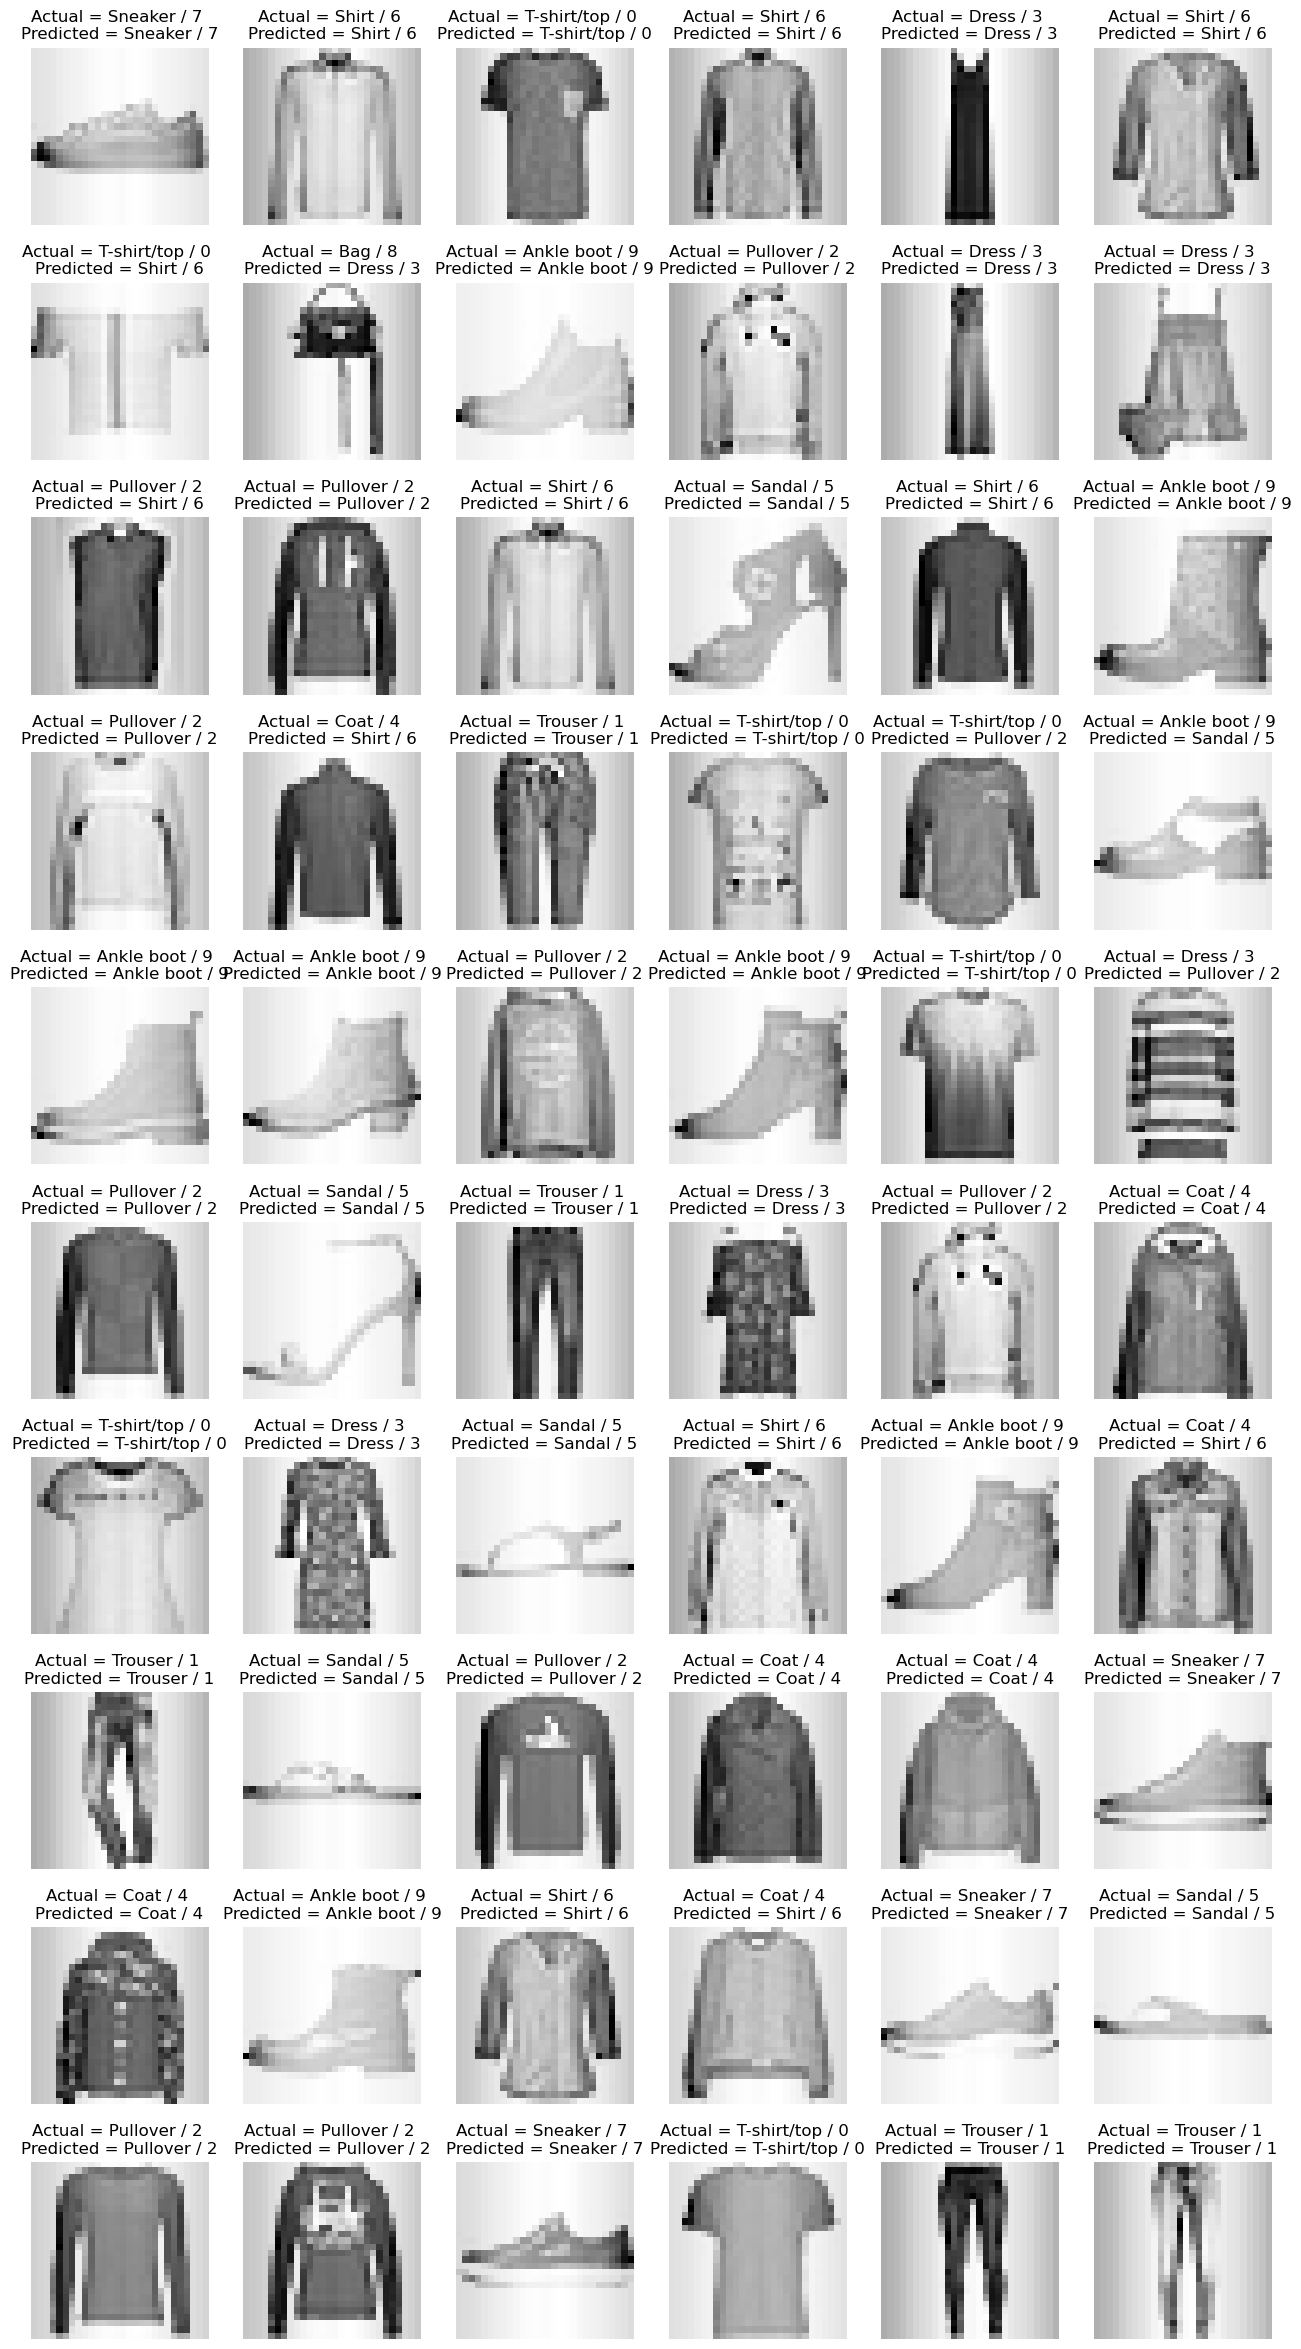

In [25]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_hat[i])],np.argmax(y_hat[i])))
  plt.axis('off')

In [26]:
cnn_model_test2.evaluate(X_test_expand, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3046 - accuracy: 0.8948


[0.304625004529953, 0.8948000073432922]

<AxesSubplot:>

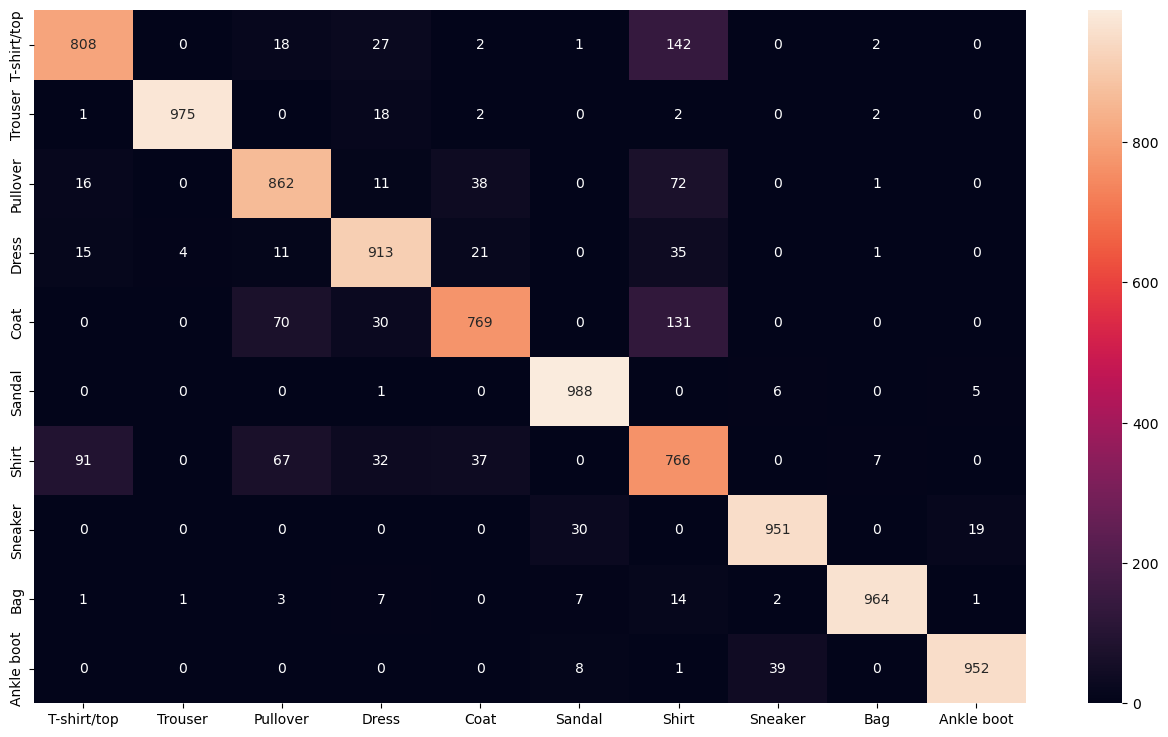

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(16,9))
y_hat_labels = [ np.argmax(label) for label in y_hat ]
cm = confusion_matrix(y_test, y_hat_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [28]:
from sklearn.metrics import classification_report
classify_report= classification_report(y_test, y_hat_labels, target_names=class_labels)
print(classify_report)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.81      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.88      0.77      0.82      1000
      Sandal       0.96      0.99      0.97      1000
       Shirt       0.66      0.77      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000



### Save model

In [29]:
import os 

path = os.path.join('Training', 'Saved Models', 'Question1')

cnn_model_test2.save(path)


INFO:tensorflow:Assets written to: Training\Saved Models\Question1\assets


INFO:tensorflow:Assets written to: Training\Saved Models\Question1\assets


In [30]:
import os

model_test3.save(path)

INFO:tensorflow:Assets written to: Training\Saved Models\Question1\assets


INFO:tensorflow:Assets written to: Training\Saved Models\Question1\assets


### Visualize TensorBoard

In [34]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [36]:
%tensorboard --logdir H:/TestCereBro/Question1/logs/Model_cnn_test_1

In [37]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 2 days, 10:30:01 ago; pid 10256)
  - port 6006: logdir H:/TestCereBro/Question1/logs/Model_cnn_test_1/ (started 2 days, 10:17:51 ago; pid 12540)
  - port 6006: logdir logs (started 3 days, 16:43:29 ago; pid 13068)
  - port 6006: logdir H:/TestCereBro/Question1/logs/Model_cnn_test_2/ (started 2 days, 10:18:55 ago; pid 13748)
  - port 6006: logdir Question1/logs/Model_cnn_test_2/ (started 2 days, 10:30:55 ago; pid 14800)
  - port 6006: logdir Question1/logs/ (started 2 days, 10:28:58 ago; pid 15780)
  - port 6006: logdir logs/Model_cnn_test2 (started 2 days, 10:37:53 ago; pid 16376)
  - port 6006: logdir Question1/logs/Model_cnn_test_2/ (started 2 days, 10:35:29 ago; pid 16800)
  - port 6006: logdir Question1/logs/Model_cnn_test_2 (started 2 days, 10:36:07 ago; pid 17672)
  - port 6006: logdir H:\TestCereBro\Question1\logs\Model_cnn_test_2 (started 2 days, 10:43:36 ago; pid 20956)
  - port 6006: logdir H:/TestCereBro/Qu

In [38]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir H:/TestCereBro/Question1/logs/Model_cnn_test_1 (started 0:00:30 ago; port 6006, pid 3540).
